### Import Necessary Libraries

In [ ]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
import re
import nltk
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import contractions
import unidecode

### Load train and test dataset

In [ ]:
train=pd.read_csv('../input/sentiment-analysis-weekend-hackathon-machinehack/train.csv')
test=pd.read_csv('../input/sentiment-analysis-weekend-hackathon-machinehack/test.csv')

### Let's see the structure of train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44100 entries, 0 to 44099
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         44100 non-null  int64 
 1   author     44100 non-null  object
 2   Review     44100 non-null  object
 3   Sentiment  44100 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


#### The train dataset contains 44100 data entries and 4 columns.
#### The target column is **Sentiment**.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      18900 non-null  int64 
 1   author  18900 non-null  object
 2   Review  18900 non-null  object
dtypes: int64(1), object(2)
memory usage: 443.1+ KB


#### The test dataset contains 18900 entries and 3 columns.

### Let's check if there is any missing value in train and test dataset.

In [ ]:
train.isnull().sum()

ID           0
author       0
Review       0
Sentiment    0
dtype: int64

In [ ]:
test.isnull().sum()

ID        0
author    0
Review    0
dtype: int64

#### The above summary shows that there is no missing in any column.

### Let's view the sample data from train and test dataset

In [ ]:
train.head()

,ID,author,Review,Sentiment
0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...,2
1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...,1
2,16767,yoliemichelle,ughhh rejected from the 09 mediation program. ...,0
3,9334,jayamelwani,@petewentz im so jealous. i want an octo drive,0
4,61178,aliisanoun,I remember all the hype around this movie when...,0


In [ ]:
test.head()

,ID,author,Review
0,29536,nathantbaker,@amyswarren ahhh yay! I'm getting into it. Kno...
1,13442,Umatter2Chtr,@DeliverImHungry You are right. If you ordere...
2,54697,bella_cullen_4,I'd heard a lot of bad things about this film ...
3,7007,marviemorales,"I miss the old... HA, HA. I can't tell that pe..."
4,34410,phaoloo,@dharshana anytime


### Let's perform exploratory data analysis.First, let see the target column distribution.

#### The target column levels are in integer format.So, for the better visulization have recoded the levels as follows.

In [ ]:
train.replace({'Sentiment':{0:'Negative_0',1:'Neutral_1',2:'Positive_2'}},inplace=True)

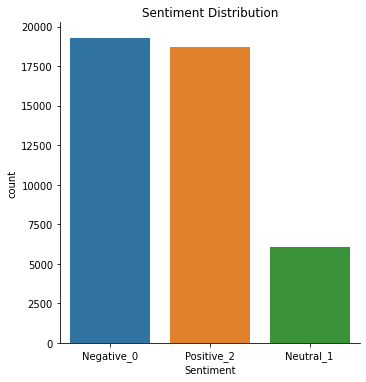

In [ ]:
ax=sns.catplot(data=train,x='Sentiment',kind='count',order=train['Sentiment'].value_counts().index,height=5)
_=plt.title("Sentiment Distribution")

In [ ]:
train['Sentiment'].value_counts()

Negative_0    19299
Positive_2    18733
Neutral_1      6068
Name: Sentiment, dtype: int64

#### The above bar chart explains that there is an class between the three classes.
#### Class is biased to positive and negative Classes.

#### Let's create a wordcloud and see most frequent words in three classes.

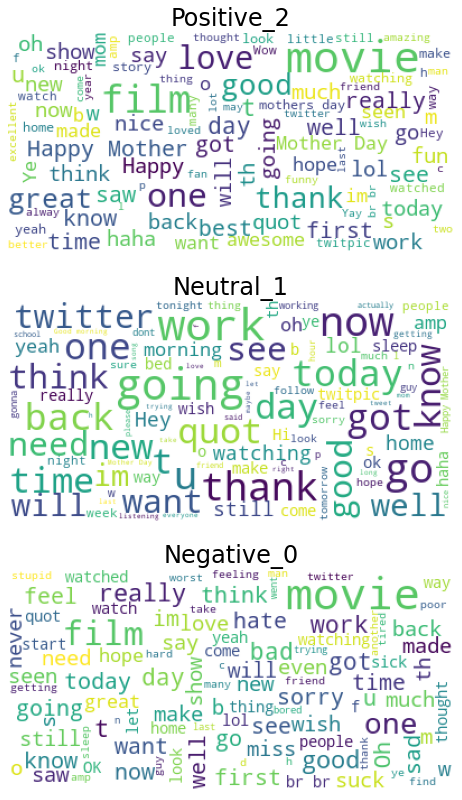

In [ ]:
c=1
plt.figure(figsize=(10, 14))
for x in train['Sentiment'].unique():
    plt.subplot(3,1,c)
    wc = WordCloud(background_color="white", max_words=100, stopwords=stopwords,
                   max_font_size=40, random_state=42).generate(train[train['Sentiment']==x]['Review'].to_string())  
   
    
    plt.imshow(wc)
    plt.title(x,fontsize='24',fontweight='20')
    plt.axis("off")
    c+=1

### Let's see most frequent words used in review.

In [ ]:
words_only=re.findall('\w{2,10}\w*',str(train['Review'])) 
nlp_words=nltk.FreqDist(words_only)

In [ ]:
from collections import Counter
dict(Counter(nlp_words).most_common(20))

{'the': 6,
 'quot': 3,
 'weird': 3,
 'an': 2,
 'movie': 2,
 'was': 2,
 'Today': 1,
 'working': 1,
 'on': 1,
 'my': 1,
 'Quirky': 1,
 'ShannonElizab': 1,
 'dont': 1,
 'ya': 1,
 'know': 1,
 'people': 1,
 'love': 1,
 'ughhh': 1,
 'rejected': 1,
 'from': 1}

#### The above information shows that **the** word is used more time in review.

#### **Note: The above results are based on raw text without pre processing**

### Most used url link types.

In [ ]:
def url_info(text):
    res=text.str.lower().str.extract("(https?:|www.)")
    return res.dropna().value_counts().nlargest(2), res.dropna().value_counts().nlargest(2).sort_values(ascending=True).plot(kind='barh',figsize=(10,8))

(http:    1304
 www.       85
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

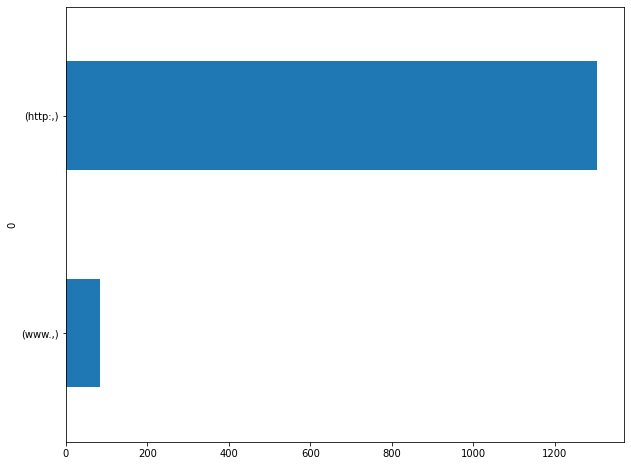

In [ ]:
url_info(train['Review'])

### Most used html tags.

In [ ]:
def html_tags(text):
    res=text.str.lower().str.extract("(<.*?>)")
    return res.dropna().value_counts().nlargest(2), res.dropna().value_counts().nlargest(2).sort_values(ascending=True).plot(kind='barh',figsize=(10,5))

(<br />       8126
 <3 <br />       1
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

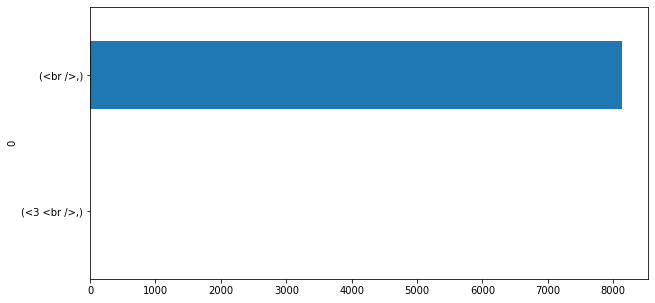

In [ ]:
html_tags(train['Review'])

### Most used html entities.

In [ ]:
def html_entity(text):
    res=text.str.lower().str.extract("(&#?[a-zA-Z0-9]+;)")
    return res.dropna().value_counts().nlargest(4), res.dropna().value_counts().nlargest(4).sort_values(ascending=True).plot(kind='barh',figsize=(10,8))

(&amp;     678
 &quot;    583
 &lt;      277
 &gt;       81
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

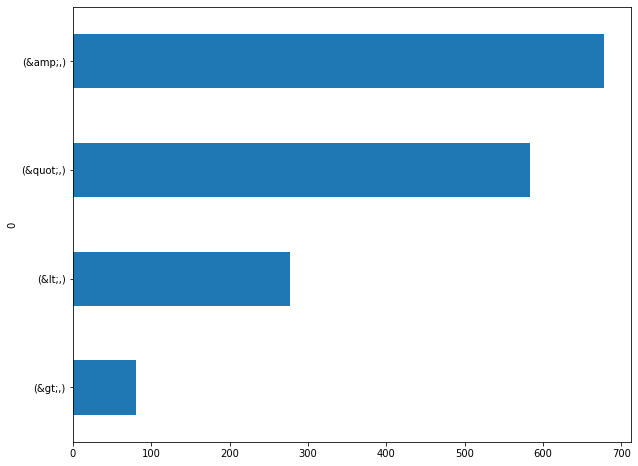

In [ ]:
html_entity(train['Review'])

### Most used digits.

In [ ]:
def digits(text):
    res=text.str.lower().str.extract("(\d+)")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,10))

(2     1334
 3     1091
 1      995
 4      884
 10     596
 5      520
 7      393
 8      385
 20     294
 9      282
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

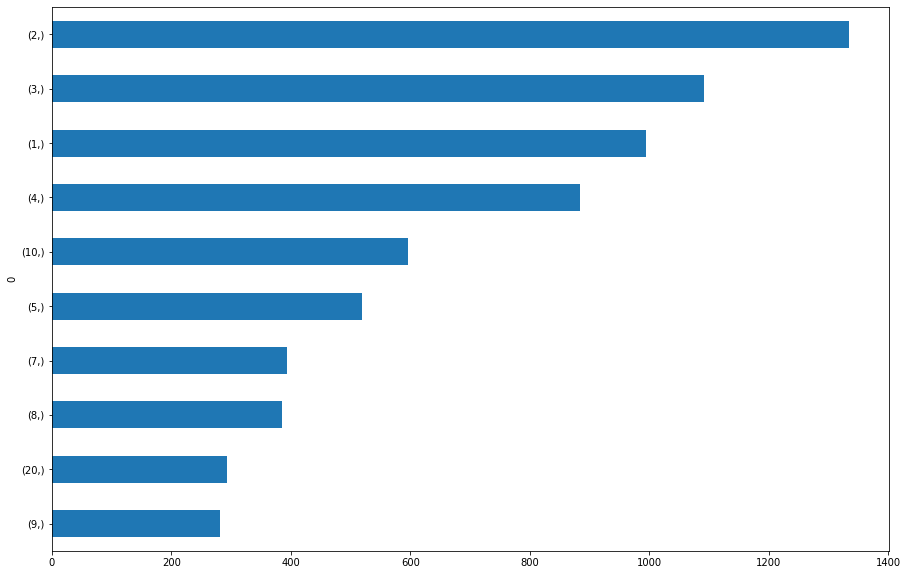

In [ ]:
digits(train['Review'])

### Let's see what are the years mentioned in the review.

In [ ]:
def year_mention(text):
    res=text.str.lower().str.extract("(\d{4})")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,10))

(1980    111
 1950     99
 1970     98
 1930     70
 2001     67
 2000     66
 2005     63
 1960     61
 1990     58
 1940     58
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

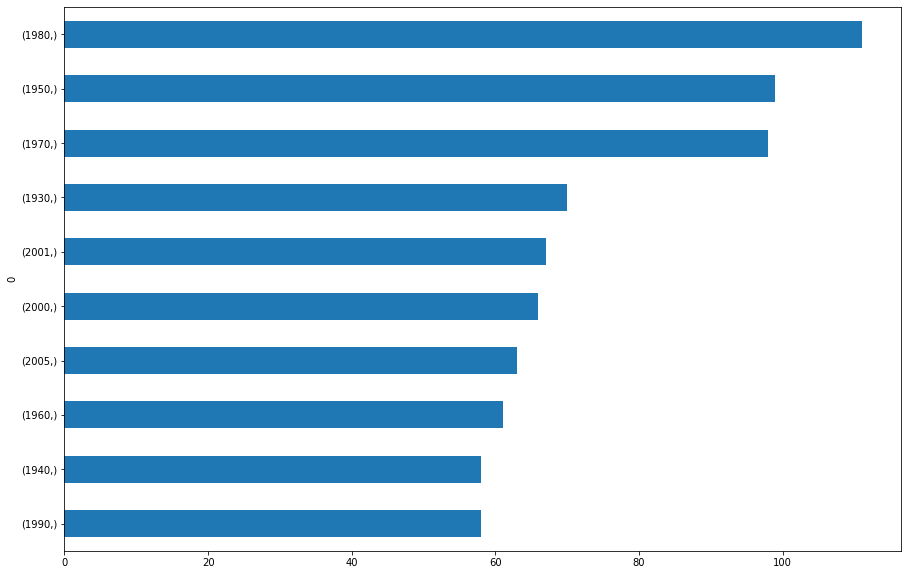

In [ ]:
year_mention(train['Review'])

### Most used mixed (Formal,Informal) Contractions.

In [ ]:
def mixed_contraction(text):
    res=text.str.lower().str.extract("([a-zA-Z]+'[a-zA-Z]+)")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,10))

(it's       2727
 i'm        2431
 don't      1778
 can't      1116
 i've        875
 didn't      864
 doesn't     622
 that's      613
 i'll        448
 isn't       426
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

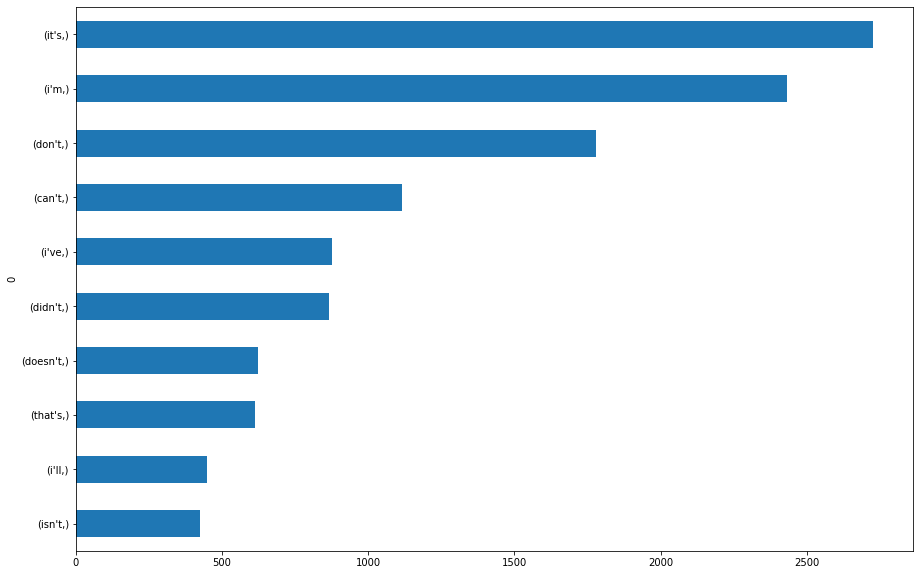

In [ ]:
mixed_contraction(train['Review'])

### Let's see is there any diacritics in review.

In [ ]:
def non_ascii(text):
    res=text.str.lower().str.extract("([^\x00-\x7F]+)")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(15,10))


(é      627
       200
 ï¿½    170
 
       123
        60
 ´       42
 £       29
 è       20
        18
 á       17
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

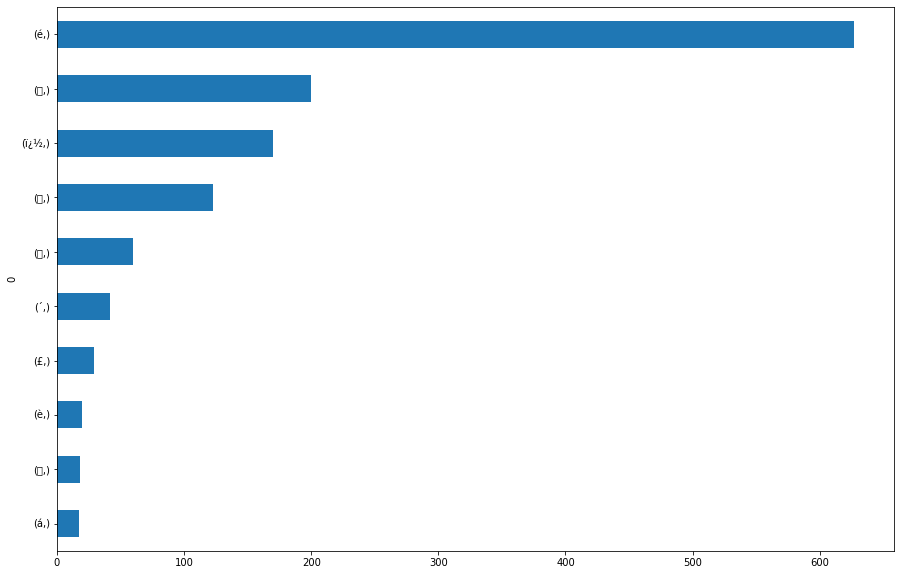

In [ ]:
non_ascii(train['Review'])

### Let's see is there any currency symbol in review.

In [ ]:
def currency(text):
    res=text.str.lower().str.extract("([$¢£¤¥֏؋৲৳৻૱௹฿៛\u20a0-\u20bd\ua838\ufdfc\ufe69\uff04\uffe0\uffe1\uffe5\uffe6])")
    return res.dropna().value_counts().nlargest(10), res.dropna().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh',figsize=(8,5))


($    443
 £     32
 ¢      1
 dtype: int64,
 <AxesSubplot:ylabel='0'>)

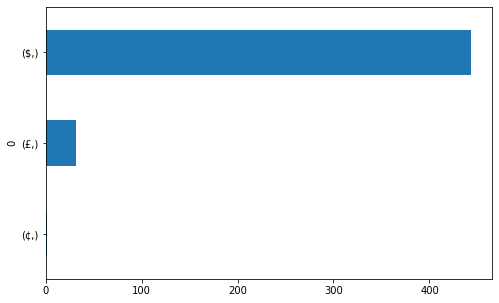

In [ ]:
currency(train['Review'])

In [ ]:
def text_pre_process(strings):
    txt=strings.lower()  # convert text to lowercse
    txt=re.sub('(https?:|www)\S+','',txt) # remove url
    txt=re.sub('<.*?>','',txt) # remove html tags
    txt=re.sub('(@[a-zA-z0-9_]+)','',txt) # remove @username
    txt=re.sub('(&#?[a-zA-Z0-9]+;)',' ',txt) # remove html special entities
    txt=unidecode.unidecode(txt) # diacritics remove
    txt=contractions.fix(txt) # contraction fix
    txt=re.sub('(\d+)',' ',txt) # remove numbers
    txt=re.sub('[^\w\s]',' ',txt) # remove punctuations
    return txt


In [ ]:
train['cleaned_text']=train['Review'].apply(text_pre_process)

In [ ]:
train.head()

,ID,author,Review,Sentiment,cleaned_text
0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...,2,today I am working on my quirky q cue or may...
1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...,1,do not ya know people love the human society
2,16767,yoliemichelle,ughhh rejected from the 09 mediation program. ...,0,ughhh rejected from the mediation program s...
3,9334,jayamelwani,@petewentz im so jealous. i want an octo drive,0,I am so jealous i want an octo drive
4,61178,aliisanoun,I remember all the hype around this movie when...,0,i remember all the hype around this movie when...
